In [1]:
import astropy

In [2]:
from astropy.io import fits

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import axes

In [4]:
import numpy as np

In [5]:
#import pylab as pl
import statsmodels.api as sm

In [6]:
fitspec = fits.open('spec-1373-53063-0583.fits')
fitspec.info()

Filename: spec-1373-53063-0583.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3833R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B2-00025393-00025391-00025392    1 BinTableHDU    146   2047R x 7C   [E, E, E, J, E, E, E]   
  5  B2-00025394-00025391-00025392    1 BinTableHDU    146

In [7]:
data =  fitspec[1].data

In [8]:
sky = data['sky']
sky = -sky/100

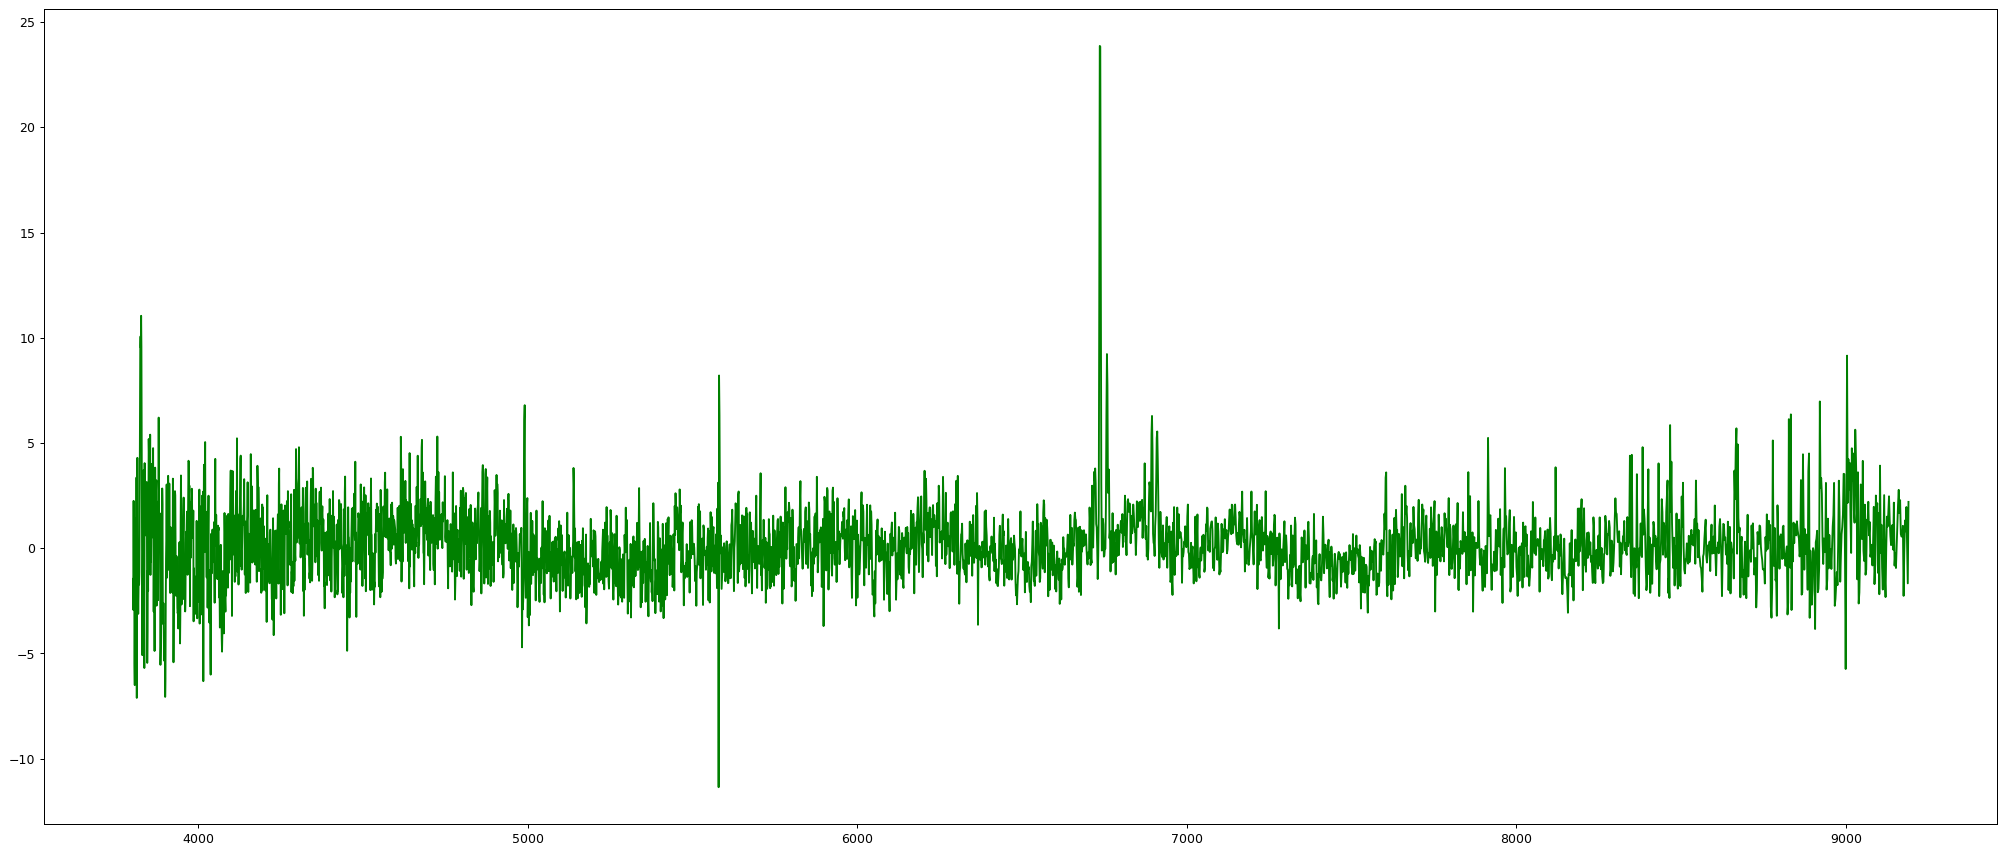

In [9]:
x = data['loglam']
y = data['flux'] - data['model'] - sky
x = 10**x
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y, color = 'green')

In [10]:
#бегающее среднее
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

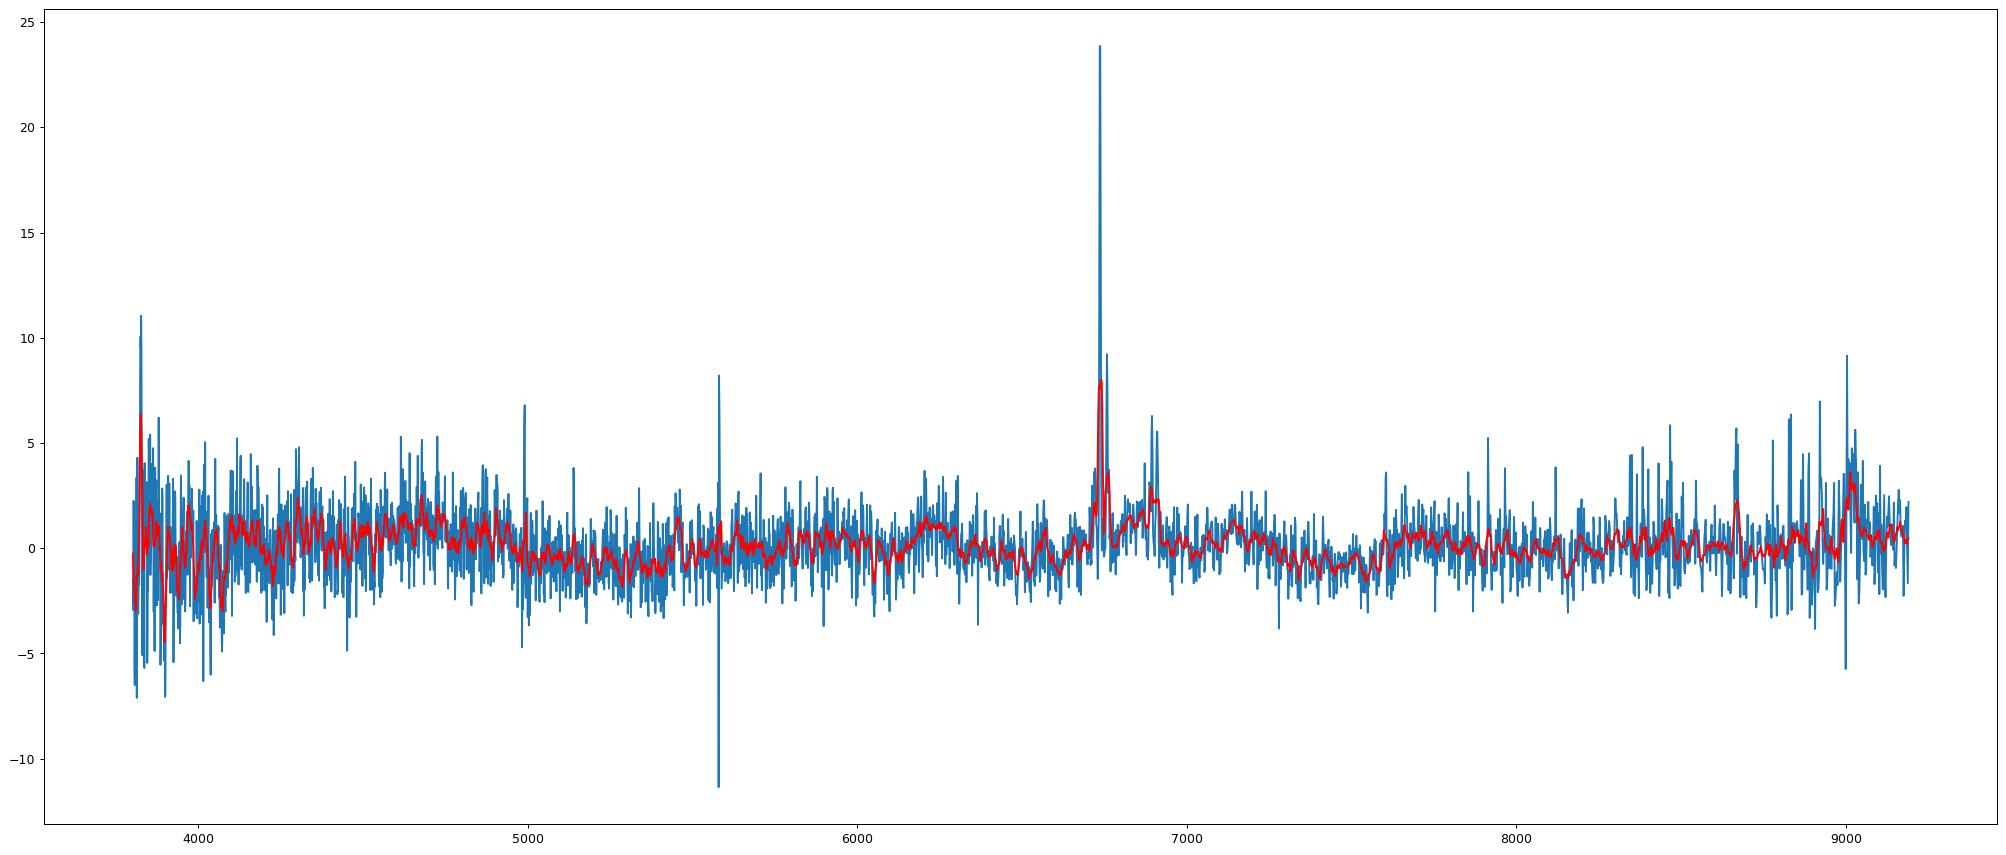

In [11]:
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y)
y_av = movingaverage(y, 10)
plt.plot(x, y_av, "r")
plt.show()

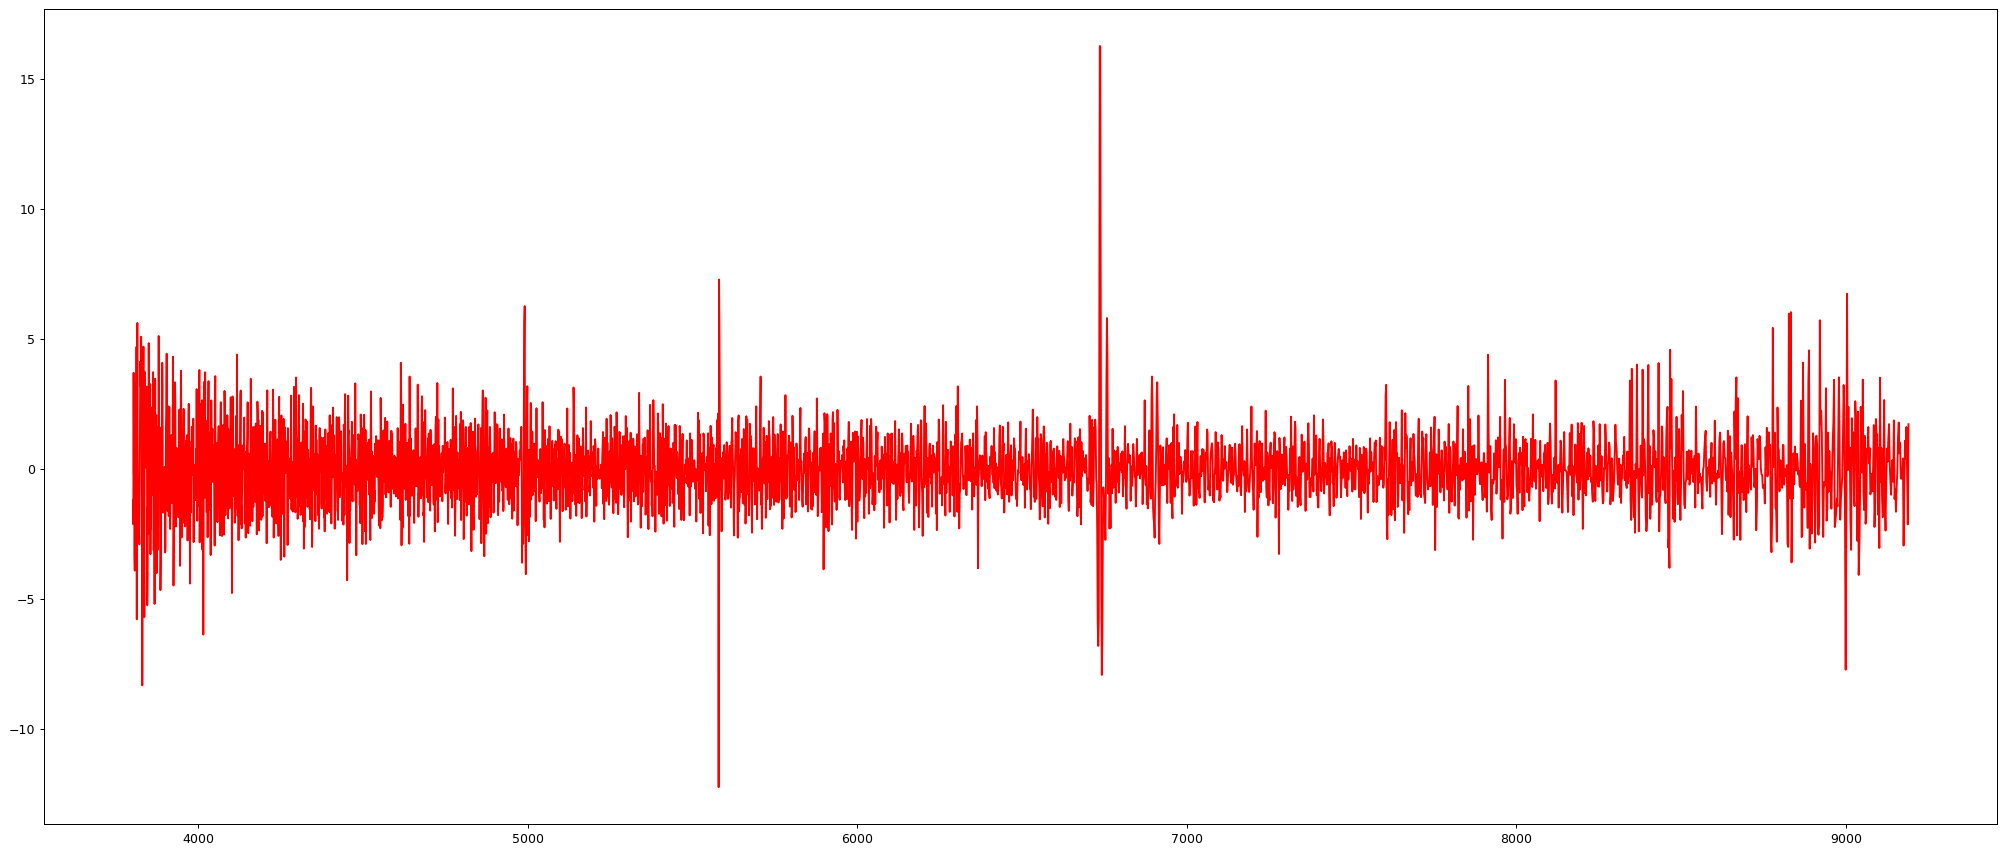

In [12]:
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y-y_av, "r")

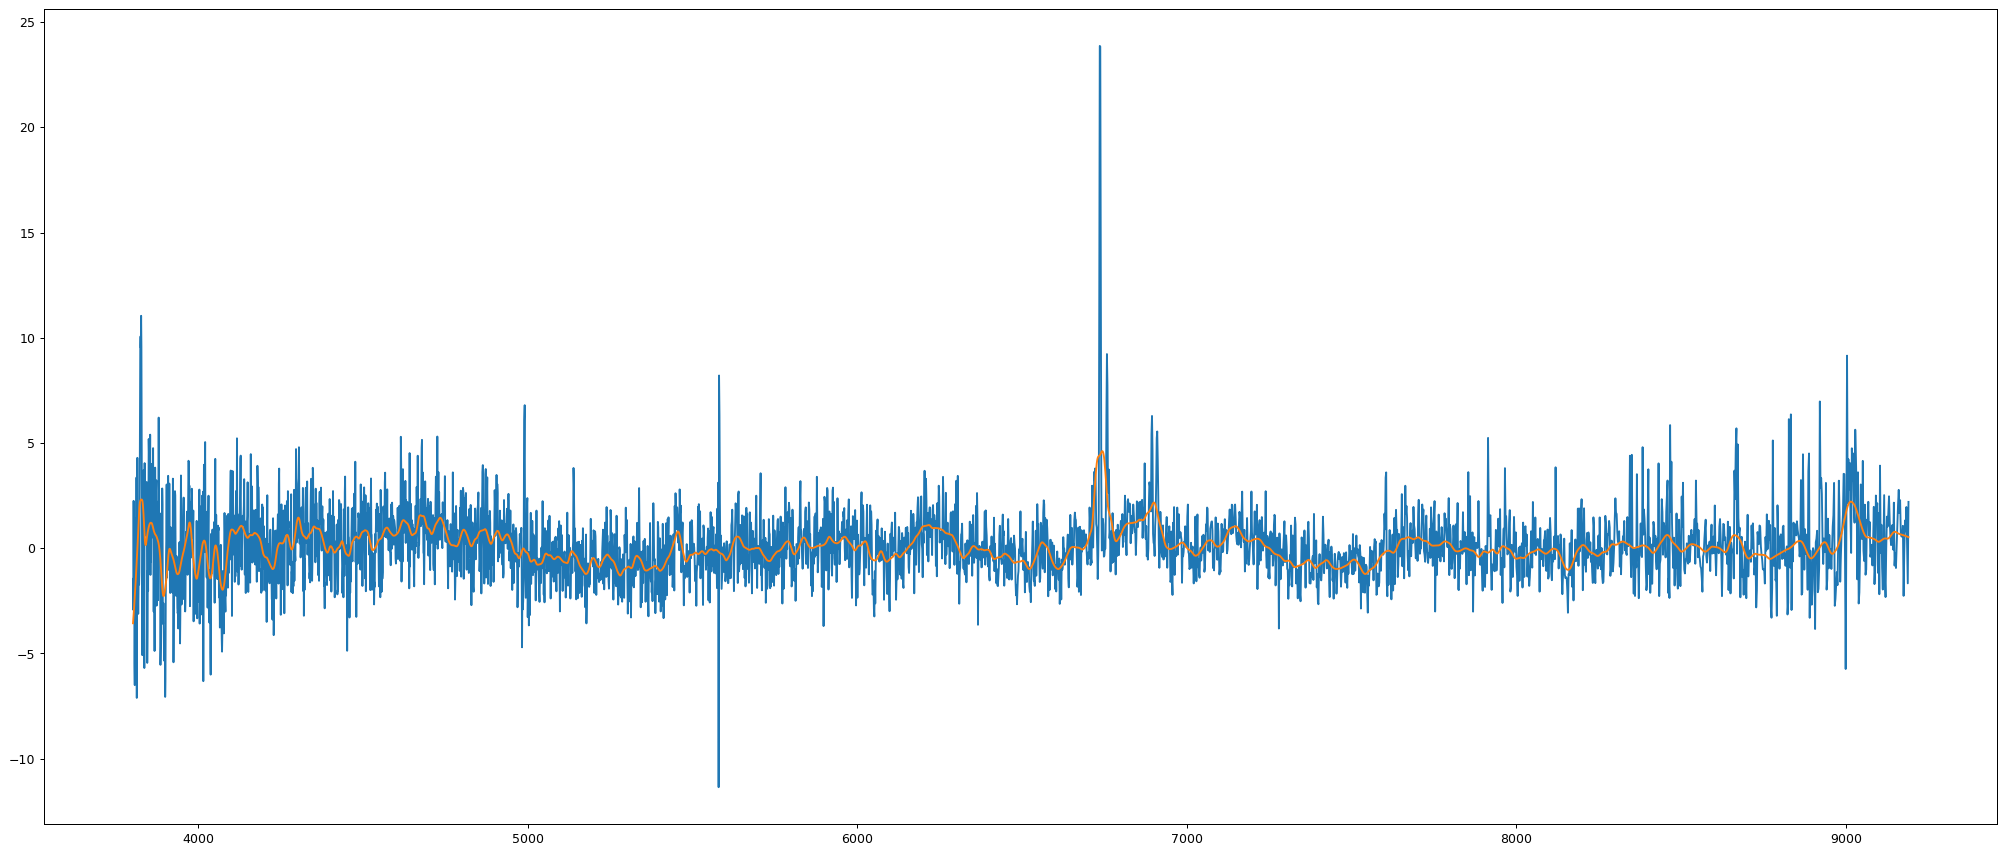

In [13]:
#lowess
figure(figsize=(28, 12), dpi=90)
plt.plot(x,y)
ylowess = data['flux'] - data['model']
xlowess = data['loglam']
xlowess = 10**xlowess
lowess = sm.nonparametric.lowess(ylowess, xlowess, it=0, frac=0.0097)
plt.plot(lowess[:, 0], lowess[:, 1])

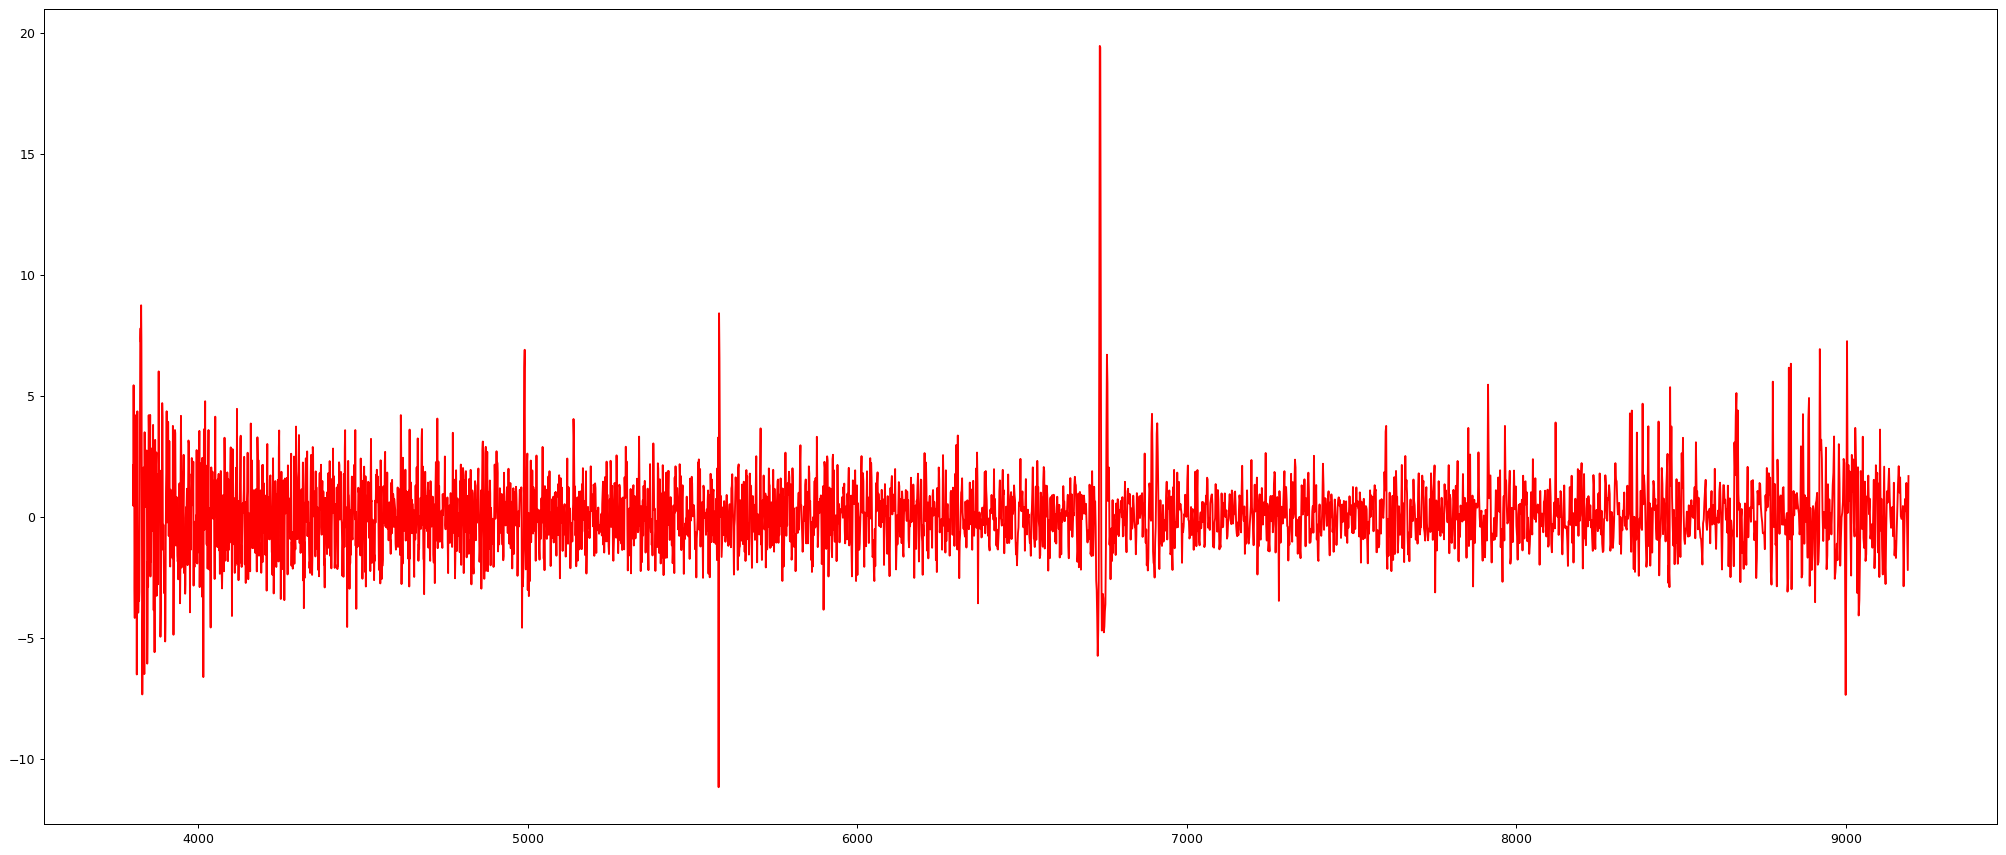

In [14]:
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y-lowess[:, 1], 'r')

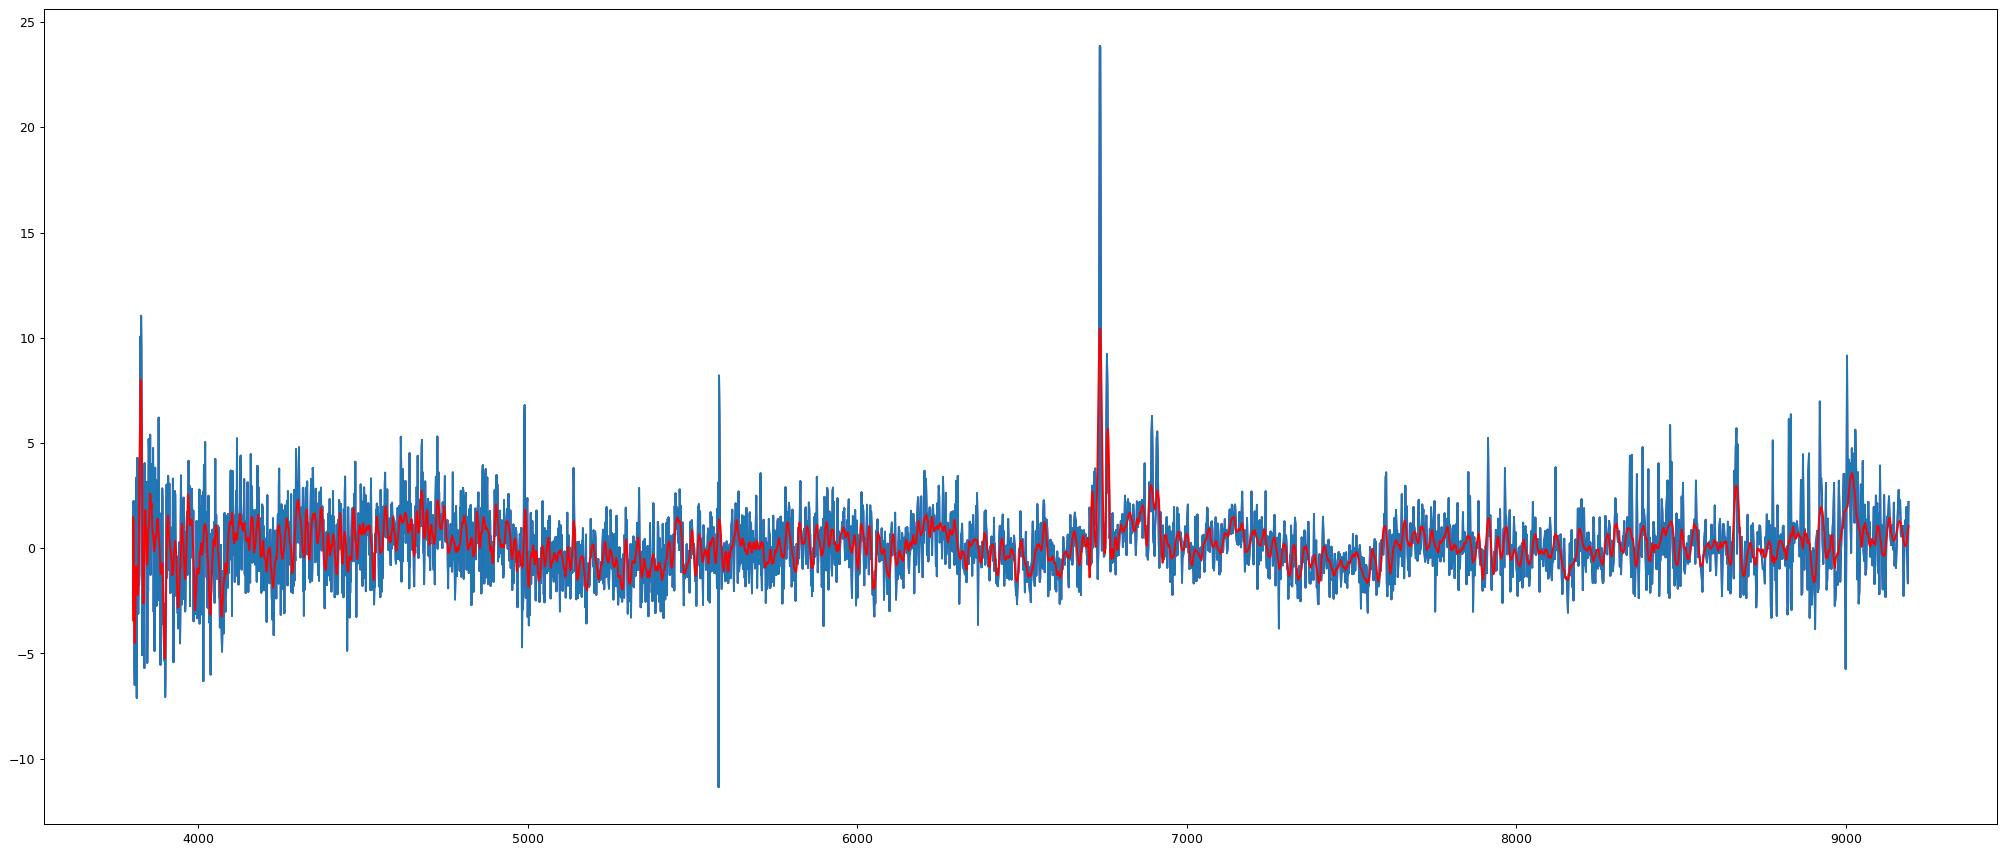

In [15]:
#savitsky-golay filter
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 51, 10) # window size 51, polynomial order 3
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y, color = 'indigo')
plt.plot(x,y)
plt.plot(x, yhat, "r")
plt.show()

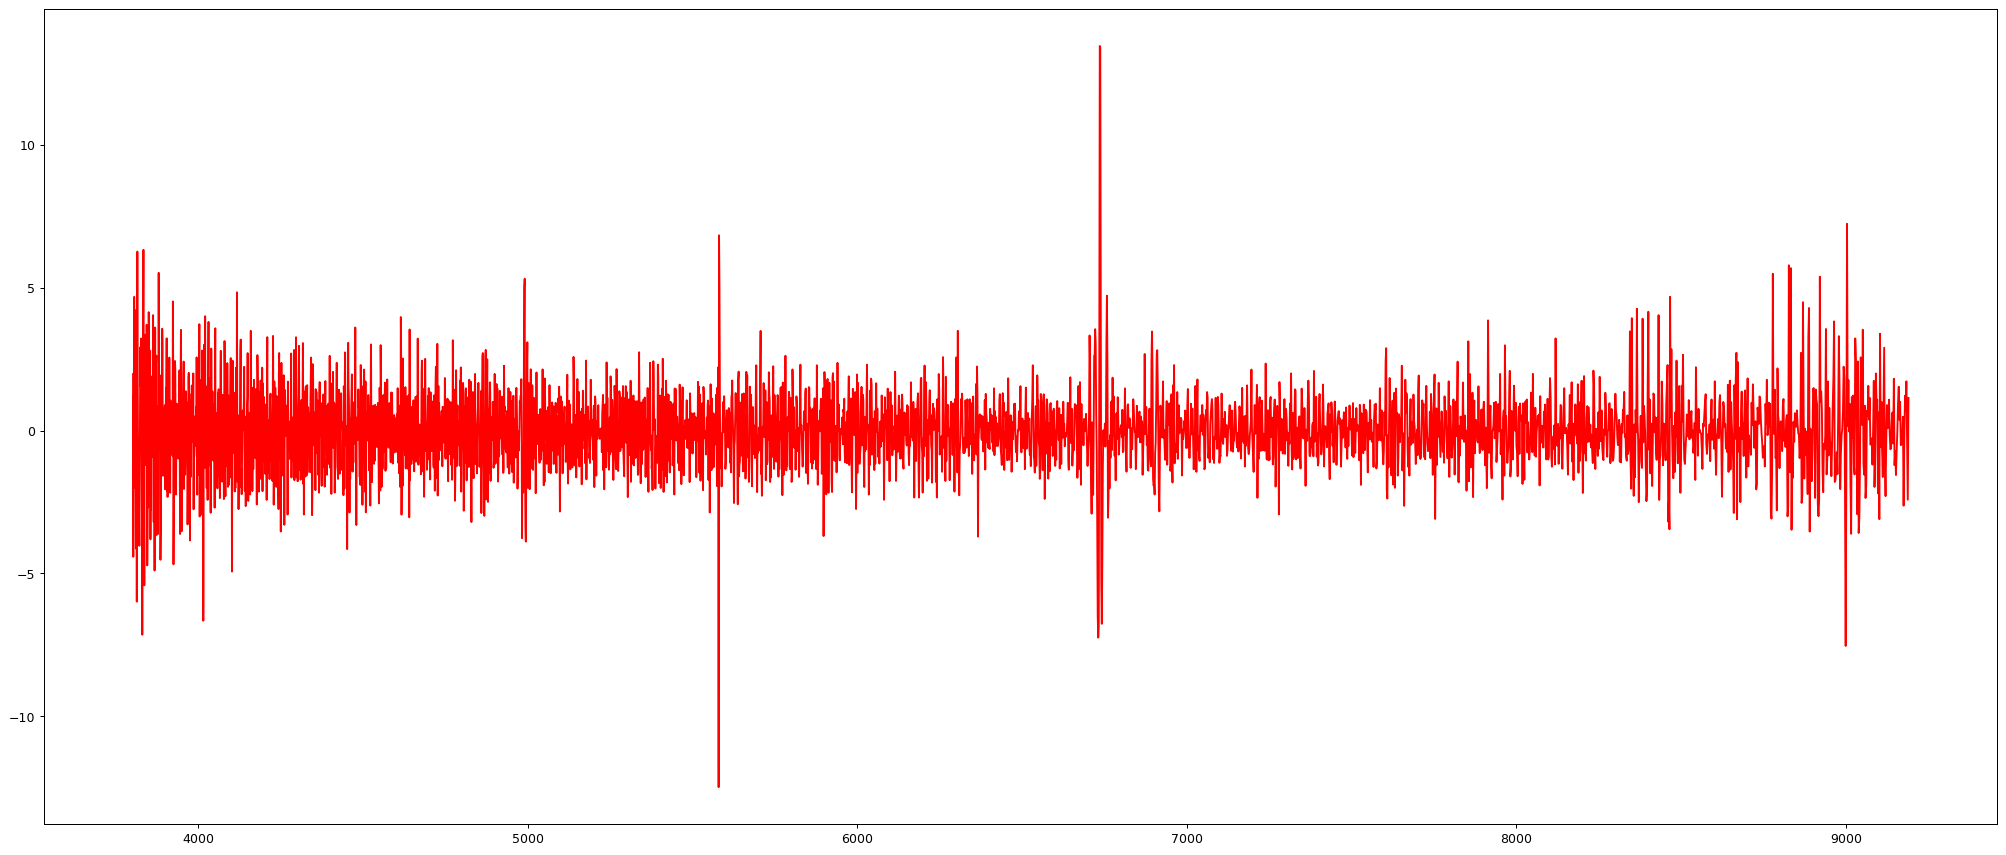

In [16]:
figure(figsize=(28, 12), dpi=90)
plt.plot(x, y-yhat, "r")
plt.show()